In [4]:
# !pip install mecab-python3
# !pip install matplotlib
# !pip install japanize-matplotlib

import MeCab

def parse_neko(fname, fname_parsed):
    mecab = MeCab.Tagger()
    with open(fname,'r',encoding='utf-8') as f:
        data = f.read()
    
    with open(fname_parsed, mode='w',encoding='utf-8') as output:
        output.write(mecab.parse(data))
    return
 
fname = 'data/ch4/neko.txt'
fname_parsed = 'data/ch4/neko.txt.mecab'
parse_neko(fname, fname_parsed)

In [5]:
'''30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．
ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，
1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．'''

def neko_store(fname_parsed):
    with open(fname_parsed, 'r', encoding='utf-8') as f:
        word_info = []
        word_infos = []
        for i,line in enumerate(f):
            info = line.split('\t')  # format: ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
            if len(info) < 2:   
                continue
            word,info = info
            details = info.split(',')
            info_tmp = {'surface': word,
                         'base': details[6],
                         'pos':  details[0],
                         'pos1': details[1],         
            }
            word_info.append(info_tmp)
            if info_tmp['pos1'] == '句点': 
                word_infos.append(word_info)
                word_info = []

    return word_infos

fname_parsed = 'data/ch4/neko.txt.mecab'
word_infos = neko_store(fname_parsed)
for i in range(3):
    print(word_infos[i])

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}, {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}, {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '生れ', 'base': '生れ

In [10]:
'''31. 動詞
動詞の表層形をすべて抽出せよ
'''
def neko_store(fname_parsed):
    with open(fname_parsed, 'r', encoding='utf-8') as f:
        word_info = []
        word_infos = []
        for i,line in enumerate(f):
            info = line.split('\t')  # format: ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
            if len(info) < 2:   
                continue
            word,info = info
            details = info.split(',')
            info_tmp = {'surface': word,
                         'base': details[6],
                         'pos':  details[0],
                         'pos1': details[1],         
            }
            word_info.append(info_tmp)
            if info_tmp['pos1'] == '句点': 
                word_infos.append(word_info)
                word_info = []

    return word_infos

verbs = set()
fname_parsed = 'data/ch4/neko.txt.mecab'
lines = neko_store(fname_parsed)
for line in lines:
    for word_info in line:
        if word_info['pos'] == '動詞':
            verbs.add(word_info['surface'])

            
print('only show 100 randomly picked items')
print('number of verb {}\n{}'.format(len(verbs),verbs))

only show 100 randomly picked items
number of verb 3892
['信じ', 'かねる', 'だまる', '流行る', '投げ込む', '遊び', '眠る', 'たどっ', 'めで', '後れ', '感ずる', '這入ら', '集まれ', 'まて', '知らせ', '見合わせ', '消える', 'ぶら下げ', '気に入る', '濡れ', '劣っ', '推す', '答え', '捩じ', 'しい', 'つけろ', '話せる', '力め', 'なげ', '数え立て', '食っ', '覗き', 'ふ', '驚かし', '引き返し', 'ねぶっ', '行っ', 'より', 'こびりつい', '砕ける', '潰し', '思い及ば', '破れ', '戒め', '超える', '切る', 'つかし', 'まじない', '眠っ', 'ふっ', '狭め', '断わり', '仕切っ', '擦', '従っ', '掛っ', '怒り', 'いつわり', '古る', '栄え', '踏みつけ', '纏める', 'よせ', '上がん', '食わせる', '及ぼし', '変ら', 'あらわし', '傾ける', '留まっ', '包ん', '乗', '転ずる', '撰ん', '取り扱っ', '見離さ', '断わっ', '急き込ん', 'どい', 'され', 'さまし', 'なさろ', '滑れ', '担ぐ', '押しやる', '果さ', '書い', '当て', 'くれれ', '見合せ', '放り出し', 'た', '張り付ける', '切り付ける', '浮べ', '拱い', '叫ぶ', '捕っ', '引ずり', 'とら']


In [11]:
'''32. 動詞の原形
動詞の原形をすべて抽出せよ．'''
def neko_store(fname_parsed):
    with open(fname_parsed, 'r', encoding='utf-8') as f:
        word_info = []
        word_infos = []
        for i,line in enumerate(f):
            info = line.split('\t')  # format: ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
            if len(info) < 2:   
                continue
            word,info = info
            details = info.split(',')
            info_tmp = {'surface': word,
                         'base': details[6],
                         'pos':  details[0],
                         'pos1': details[1],         
            }
            word_info.append(info_tmp)
            if info_tmp['pos1'] == '句点': 
                word_infos.append(word_info)
                word_info = []

    return word_infos


verbs = set()
lines = neko_store(fname_parsed)
for line in lines:
    for word_info in line:
        if word_info['pos'] == '動詞':
            verbs.add(word_info['base'])

print('only show 100 randomly picked items')
print('number of verb {}\n{}'.format(len(verbs),verbs))

only show 100 randomly picked items
number of verb 2298
['驚く', '掻ける', 'あてつける', '酔っ払う', '見当る', '春めく', '惜しむ', '振り向く', '洒落れる', 'きく', '巻く', '魂消る', '引き上げる', '狼狽える', '己惚れる', 'おる', '挟まる', '磨ける', '振い落す', '捻る', '出直す', '貫く', 'つけ込む', '煩わす', 'からげる', 'はみ出す', '食いつく', '怒る', '喫する', '写る', '遣わす', 'つむ', 'とめる', '仕る', 'まがる', '来す', '勝つ', '取り極める', 'こたえる', '変る', '卸す', '数え立てる', '捩じる', '供える', '停る', '甘える', '掬う', '佇む', '働ける', '取り払う', '睡る', '命じる', '息む', 'きせる', '逃げる', '抑える', '復す', '届け出る', '守る', '彩る', '書く', '離す', '喩える', '平伏す', '調子づく', '吸取る', 'めぐらす', '映じる', 'いやがる', '打殺す', 'ぶらさがる', '綯う', 'おっしゃる', 'あげる', '燻る', '生き返る', '与える', '見える', 'うける', '決する', 'こく', '弾き出す', '嘯く', '満ちる', 'かす', 'ねぶる', '包む', '下る', 'あらす', '見送る', '糺す', '踏切る', '擲つ', '飾る', '騒ぎ立てる', '傾く', 'くらむ', 'しだす', '合う', '凋む']


In [13]:
'''33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ'''
def neko_store(fname_parsed):
    with open(fname_parsed, 'r', encoding='utf-8') as f:
        word_info = []
        word_infos = []
        for i,line in enumerate(f):
            info = line.split('\t')  # format: ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
            if len(info) < 2:   
                continue
            word,info = info
            details = info.split(',')
            info_tmp = {'surface': word,
                         'base': details[6],
                         'pos':  details[0],
                         'pos1': details[1],         
            }
            word_info.append(info_tmp)
            if info_tmp['pos1'] == '句点': 
                word_infos.append(word_info)
                word_info = []

    return word_infos


lines = neko_store(fname_parsed)
list_a_and_b = []

for line in lines:
    if len(line) < 2:
        continue
    for i in range(1,len(line)-1):
        if line[i-1]['pos'] == "名詞" \
        and line[i]['surface'] == "の" \
        and line[i+1]['pos'] == "名詞":
            list_a_and_b.append(line[i-1]['surface'] + "の" + line[i+1]['surface'])
        
a_and_b = set(list_a_and_b)

print('only show 100 randomly picked items')
print('number of a no b {}\n{}'.format(len(a_and_b),a_and_b))

only show 100 randomly picked items
number of a no b 4927
['館の境', '甘干しの渋柿', '真の珍', '屋敷のまわり', '挨拶のしようが', '茶の木の根', 'はずのもの', '南蛮の材料', '屋の前', '君の前', '一文の価値', '力の発達', '盛徳の長者', '蛙の眼球', '流の消極', '籠の中', '庭の立木', '時の主人', '品性の比較', '寒月の名', '館の倉', '一時の劣情', '何の苦', '夫子の所', '人間の珍重', '平凡の堂', '鉄扇の伯父', '人間の考', '重箱のなか', '月形の欠け目', 'はずの者', '鍋の尻', '感服の至り', '昨今のところ', '主人の一夜作り', '眼前の習慣', '君の説明', '主人の屋敷', '天気の話', '仏の意', '頭の男', '書物の上', 'ぐるの栄', '他の猫', '考究の結果', '在来のまま', '子の鼻', '句の価値', '銀製の吾輩', '旗本のよう', '君の評', '曲線の美', '膝の上', '右手の指', '当世の才子', 'ナポレオンのそれ', 'ドルの教師', '有名の大家', '大切の時間', '世の中の奴', 'もってのほかの事', '天気の日曜', '時代の人', 'しゃけの一切', '彼の説', '中の活力', '奨励の具', '僕の伯父', '東京の呉服', '人間の寂滅', '家の菩提所', '登場の人物', '自覚の一助', '通りの次第', '亀の子', '書斎の椽側', '輪の角', '娼家の下婢', '開化の業', '与太郎のよう', '爺さんの御馳走', '女の品行', '水の壮士', '車夫の先祖', '心の落着', '縮緬の二枚重ね', '口の周囲', '事件の発展', '今の人', '前足の運動', '先生の方', '沙弥のうち', '画の蘭', '見ず知らずの年長', '氏の時代', '頭の先', '一穂の春', '猫の皮', 'イスキラスの頭', '中の東郷']


In [15]:
'''34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．'''
def neko_store(fname_parsed):
    with open(fname_parsed, 'r', encoding='utf-8') as f:
        word_info = []
        word_infos = []
        for i,line in enumerate(f):
            info = line.split('\t')  # format: ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
            if len(info) < 2:   
                continue
            word,info = info
            details = info.split(',')
            info_tmp = {'surface': word,
                         'base': details[6],
                         'pos':  details[0],
                         'pos1': details[1],         
            }
            word_info.append(info_tmp)
            if info_tmp['pos1'] == '句点': 
                word_infos.append(word_info)
                word_info = []

    return word_infos


lines = neko_store(fname_parsed)

list_longest_noun = []
for line in lines:
    list_noun = []
    for i in range(len(line)):
        if line[i]['pos'] == "名詞":
            list_noun.append(line[i]['surface'])
        else:  # if next word is not noun, add noun appended in list_noun
            if len(list_noun) > 1:
                list_longest_noun.append("".join(list_noun))
            list_noun = []
    if len(list_noun) > 1: # if last word is noun
        list_longest_noun.append("".join(list_noun))
        
longest_noun = set(list_longest_noun)
print('only show 100 randomly picked items')            
print('number of longest a no b {}\n{}'.format(len(longest_noun),longest_noun,100))

only show 100 randomly picked items
number of longest a no b 4493
['なに学校', '罪人さ', '鼻祭り', '雑物', 'ごと勉強', '住家', '大変尊敬', '一番利口', '承知可', '刺物', '二疋', '小笠原流', 'アハハハ君', '金箔つき', '旧約全書', '陣勢', '鴨南蛮', '袷一枚', '是非香の物', '是非いっしょ', '寸方', '沈静端粛', '帰宅せん間', '人迹稀', '敷居越', '——いや身分', '時候後れ', '一枚一枚', '大分俳句', 'スリ泥棒', '賦税', 'さ三尺', '已む', '時局問題', '地蔵さん', '一書', '新奇発明', '八字髯', '我々仲間', '何時', '大方虫', '独仙流', '寒月君', '反覆読誦', 'ゴシック趣味', '永持', '韋駄天', '職員共', '木板', '一人前', '晩帰り', '怪狸', 'さっき座敷', '独仙君', '此盛典', '泥溝', '小泉八雲先生', '二切', '露西亜兵', 'いくら薬', '言ここ', 'かん徳利', '周囲一尺', '上り口', 'ボーン', '雪江さん飄然', '巡りさん', '吾知らず', '箆棒め', '二読本', '母堂様', '語り了', 'んざあ', '下宿屋', '——」「先生', '千人近く', 'なんぼ静岡', '結果主人', '愉快そう', '以来今日', '曰く火', '方専門', '三日前', '消毒器', '二三百本', '奴さん手拭', 'なに喜劇', '二八', '皆熱心', '清戯', '時電光影裏', '運動場', '結果病気', '好男子寒月君', '生理的器械', '贅沢屋', '本色', '——博士', '製本実費', '生意気書生']


In [21]:
# 35. 単語の出現頻度
# 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．
from collections import Counter

def neko_store(fname_parsed):
    with open(fname_parsed, 'r', encoding='utf-8') as f:
        word_info = []
        word_infos = []
        for i,line in enumerate(f):
            info = line.split('\t')  # format: ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
            if len(info) < 2:   
                continue
            word,info = info
            details = info.split(',')
            info_tmp = {'surface': word,
                         'base': details[6],
                         'pos':  details[0],
                         'pos1': details[1],         
            }
            word_info.append(info_tmp)
            if info_tmp['pos1'] == '句点': 
                word_infos.append(word_info)
                word_info = []

    return word_infos


lines = neko_store(fname_parsed)

words = []
for line in lines:
    for i in line:
        words.append(i['surface'])
   
print('only show 10 items')
for i in (Counter(words).most_common()):
    print(i)

only show 10 items
('の', 9194)
('。', 7486)
('て', 6873)
('、', 6772)
('は', 6422)
('に', 6268)
('を', 6071)
('と', 5515)
('が', 5339)
('た', 3989)


['の', '。', 'て', '、', 'は', 'に', 'を', 'と', 'が', 'た']


<BarContainer object of 10 artists>

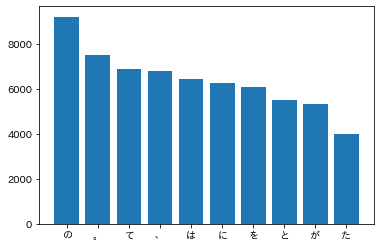

In [12]:
'''36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．'''

import matplotlib.pyplot as plt
import japanize_matplotlib


most_common_ten = Counter(words).most_common(10)
ten_words = [most_common_ten[i][0] for i in range(len(most_common_ten))]
ten_freq = [most_common_ten[i][1] for i in range(len(most_common_ten))]

plt.bar(ten_words, ten_freq, width=0.8)


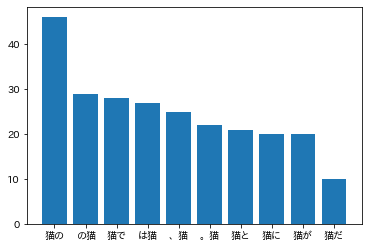

['猫である', '、猫の', '吾輩は猫', '猫といえ', 'は猫で', 'が、猫', '。猫の', 'の猫で', '吾等猫', '猫だから']


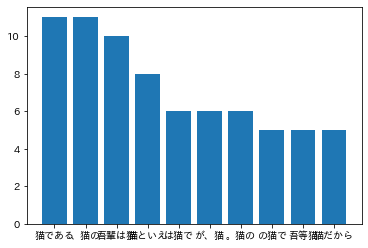

In [99]:
'''37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．
'''
import matplotlib.pyplot as plt
import japanize_matplotlib

def neko_store(fname_parsed):
    with open(fname_parsed, 'r', encoding='utf-8') as f:
        word_info = []
        word_infos = []
        for i,line in enumerate(f):
            info = line.split('\t')  # format: ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
            if len(info) < 2:   
                continue
            word,info = info
            details = info.split(',')
            info_tmp = {'surface': word,
                         'base': details[6],
                         'pos':  details[0],
                         'pos1': details[1],         
            }
            word_info.append(info_tmp)
            if info_tmp['pos1'] == '句点': 
                word_infos.append(word_info)
                word_info = []

    return word_infos


words = []
lines = neko_store(fname_parsed)
for line in lines:
    for word_info in line:
            words.append(word_info['surface'])

def find_ngrams(input_list, n): 
    return zip(*[input_list[i:] for i in range(n)])

bi_word = find_ngrams(words,2)
bi_neko = [i for i in bi_word if '猫' in i]
most_common_ten = Counter(bi_neko).most_common(10)


ten_words = ["".join(most_common_ten[i][0]) for i in range(len(most_common_ten))]
ten_freq = [most_common_ten[i][1] for i in range(len(most_common_ten))]

plt.bar(ten_words, ten_freq, width=0.8)
plt.show()

tri_word = find_ngrams(words,3)
tri_neko = [i for i in tri_word if '猫' in i]
most_common_ten = Counter(tri_neko).most_common(10)

ten_words = ["".join(most_common_ten[i][0]) for i in range(len(most_common_ten))]
ten_freq = [most_common_ten[i][1] for i in range(len(most_common_ten))]


plt.bar(ten_words, ten_freq, width=0.8)
print(ten_words)

Text(0, 0.5, 'words')

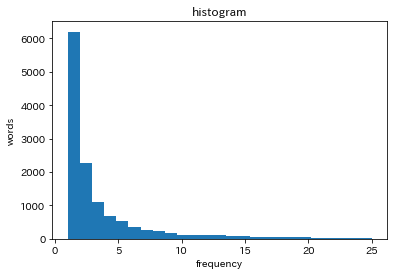

In [101]:
'''38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け'''
import matplotlib.pyplot as plt
import japanize_matplotlib


words = []
for line in lines:
    for i in line:
        words.append(i['surface'])
        
most_common_words = Counter(words).most_common()
freq = [most_common_words[i][1] for i in range(len(most_common_words))]


plt.hist(freq,bins=25,range=(1, 25))
plt.title("histogram")
plt.xlabel('frequency')
plt.ylabel('words')

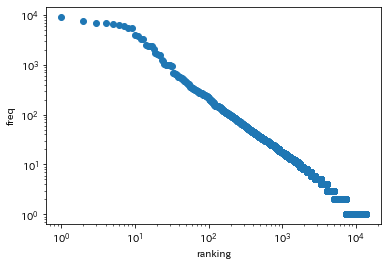

In [15]:
'''39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．'''
import matplotlib.pyplot as plt
import japanize_matplotlib


words = []
for line in lines:
    for i in line:
        words.append(i['surface'])
        
most_common_words = Counter(words).most_common()
freq = [most_common_words[i][1] for i in range(len(most_common_words))]

plt.scatter(range(1, len(freq)+1),  freq)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ranking')
plt.ylabel('freq')
plt.show()